In [1]:
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import json

from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure, output_file, show, save
from bokeh.io import export_png
import matplotlib.pyplot as plt

import pyproj # For converting WGS84 to lat long
import geopandas as gpd #for drawing shapefiles
import descartes


In [2]:
# Helper functions

def coords_to_wgs84(x, y):
    """
    This function is used to convert the wgs84 representation into regular lng, lat coordinates
    """
    # copy the SR-ORG:6781 definition in Proj4 format from http://spatialreference.org/ref/sr-org/6781/
    p1 = pyproj.Proj("+proj=sterea +lat_0=52.15616055555555 +lon_0=5.38763888888889 +k=0.9999079 +x_0=155000 +y_0=463000 +ellps=bessel +towgs84=565.237,50.0087,465.658,-0.406857,0.350733,-1.87035,4.0812 +units=m +no_defs")
    p2 = pyproj.Proj(proj='latlong',datum='WGS84')

    try:
        lon, lat, z = pyproj.transform(p1, p2, x, y, 0.0)
    except:
        lon, lat = 999, 999
    return [lon, lat]

In [3]:
def load_data(pages = 725, save=False):
    """
    Loops through all pages of the API of garbage containers and stores these in a DF.
    The fraction and coordinates are saved with the unique id.
    """

    # Formation of variables to be filled in loop
    containers = []
    coordinates = []
    type_vuil = []
    counter = 0
    container_ids = []
    lons_new = []
    lats_new = []

    # Initial link to send GET request to
    link = 'https://api.data.amsterdam.nl/vsd/afvalcontainers'

    # While loop to get all pages
    while link != None and counter < pages: #100 as limit for testing purpose
        counter += 1 #Update counter
        response = requests.get(link) # Send request
        output = response.json()
        for result in output['results']:
            try:
                containers.append(result)
                container_ids.append(result['container_id'])
    #             lons_new.append(float(result['container_wgs84_lon']))
    #             lats_new.append(float(result['container_wgs84_lat']))
                lons_new.append(result['container_geometrie']['coordinates'][0])
                lats_new.append(result['container_geometrie']['coordinates'][1])
                type_vuil.append(result['container_afvalfractie'])
            except:
                print('a')
                pass 
        try:
            link = output['_links']['next']['href'] # Get link to next page

        except:
            link = None

    df= pd.DataFrame([container_ids, lons_new, lats_new, type_vuil]).T.rename(columns={0: 'id', 1:'x', 2:'y', 3:'fractie'})
    
    if save:
        df.to_csv('/../data/containers.csv')
    return df, containers

In [51]:
# Bokeh interactive representation
def to_bokeh_interactive(df):
    TOOLS="crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
    
    # Configuring hover over tooltip
    TOOLTIPS = [
    ("index", "$index"),
    ("(x,y)", "($x, $y)"),
    ("radius", "@radius"),
    ("fill color", "$color[hex, swatch]:fill_color"),
    ("foo", "@fractie"),
    ("Fractie", "$name"),
]

    colors = {'Rest':'grey', 'Papier':'red', 'Plastic':'orange', 'Glas':'green', 'Textiel': 'blue', 'Brood': 'purple', None: 'pink'}
    p = figure(tools=TOOLS, tooltips = TOOLTIPS, title="Garbage Containers in Amsterdam", x_range=(110000, 135000), y_range=(475000, 495000), plot_width = 750, plot_height=600)
    
    # To be able to name them
    for fraction in df.fractie.unique():
        if fraction != None:
            df_temp = df[df['fractie'] == fraction]
            p.circle(x = df_temp['x'], y = df_temp['y'], fill_color=colors[fraction], line_width=0, radius=10, name=fraction, legend_label=str(fraction))
    p.patches('xs', 'ys', source=geosource, fill_color='grey', alpha=0.2)
#     p.patches('xs', 'ys', source=geosource2, fill_color='grey', alpha=0.2)
    p.patches('xs', 'ys', source=geosource3, fill_color='grey', alpha=0.2)
    p.legend.location = "bottom_left"
    output_file("garbage_containers.html")
    show(p)
    return p

In [5]:
df, containers = load_data(pages=725)

a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a


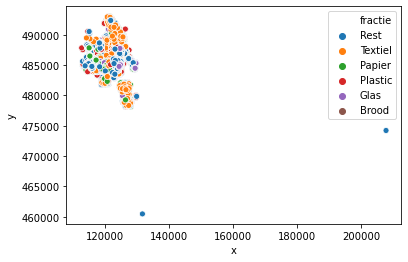

In [6]:
sns.scatterplot(x=df.x, y=df.y, hue=df.fractie)
# Data cleaning is necessary

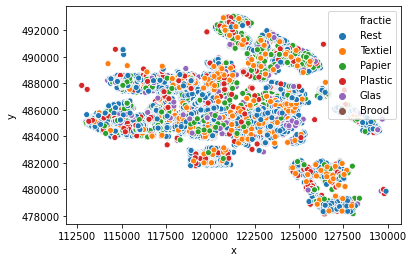

In [7]:
df = df[df['x'] < 140000]
df = df[df['y'] > 470000]
sns.scatterplot(x=df.x, y=df.y, hue=df.fractie)

In [53]:
p = to_bokeh_interactive(df)

In [52]:
# Plot on the actual map of Amsterdam
street_map = gpd.read_file('../data/woonbc12_region.shp')
street_map2 = gpd.read_file('../data/bc2010zw_region.shp')
street_map3 = gpd.read_file('../data/Inzameling_huisvuil_100220.shp')
street_map3 = street_map3[street_map3['aanbiedwij'] == 'Breng uw restafval  naar een container voor restafval.']

geosource = GeoJSONDataSource(geojson = street_map.to_json())
geosource2 = GeoJSONDataSource(geojson = street_map2.to_json())
geosource3 = GeoJSONDataSource(geojson = street_map3.to_json())

In [49]:
save(p)
export_png(p, filename="containers.png")

'C:\\Users\\corne\\OneDrive\\Documenten\\ISDS\\Master_Thesis\\Amsterdam_carbage_thesis\\Notebooks\\containers.png'